# Single band Images

## Imports

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rs
from rasterio.enums import Resampling

## Loading images

In [43]:
def load_image(file_prefix, bands):
    image_dict = {}
    profile_dict = {}
    array_dict = {}
    for band in bands:
        file = file_prefix + band + '.TIF'
        print(f'Opening {file}')
        data = rs.open(file)
        image_dict.update({band: data})
        profile_dict.update({band: data.profile})
        array_dict.update({band: data.read(1)})
    
    return image_dict, profile_dict, array_dict

In [44]:
img, prf, data = load_image('LC08_L2SP_200024_20220225_20220301_02_T1_SR_', ['B2', 'B3', 'B4'])

Opening LC08_L2SP_200024_20220225_20220301_02_T1_SR_B2.TIF
Opening LC08_L2SP_200024_20220225_20220301_02_T1_SR_B3.TIF
Opening LC08_L2SP_200024_20220225_20220301_02_T1_SR_B4.TIF


## Georeferencing

In [46]:
# showing that the georeference of the image is included
print(prf['B2'])

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 7991, 'height': 8071, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(30.0, 0.0, 310485.0,
       0.0, -30.0, 5847915.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


ERROR 1: PROJ: proj_identify: /Users/aaliyamanji/miniconda3/envs/cosmoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


## Showing each RGB band

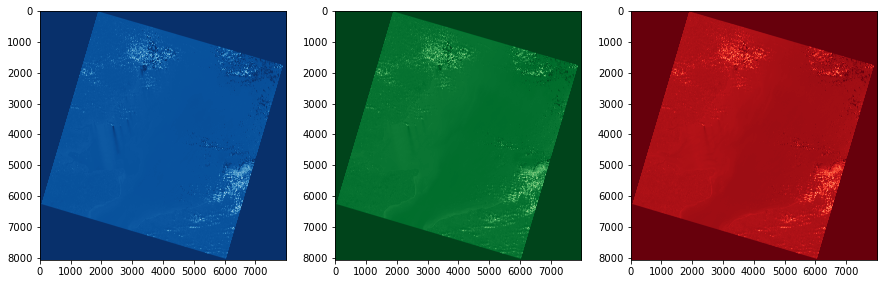

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(data['B2'], cmap='Blues_r')
ax[1].imshow(data['B3'], cmap='Greens_r')
ax[2].imshow(data['B4'], cmap='Reds_r')

## High Resolution 'True Colour' Asset

In [55]:
def display_true_colour(img, r, g, b, alpha=1.):
    rgb = np.stack([img[r], img[g], img[b]], axis=-1)
#     need this line because imshow input values need to be in the range of 0 - 1
    rgb = rgb/rgb.max() * alpha
    plt.figure(figsize=(15, 15))
    plt.imshow(rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


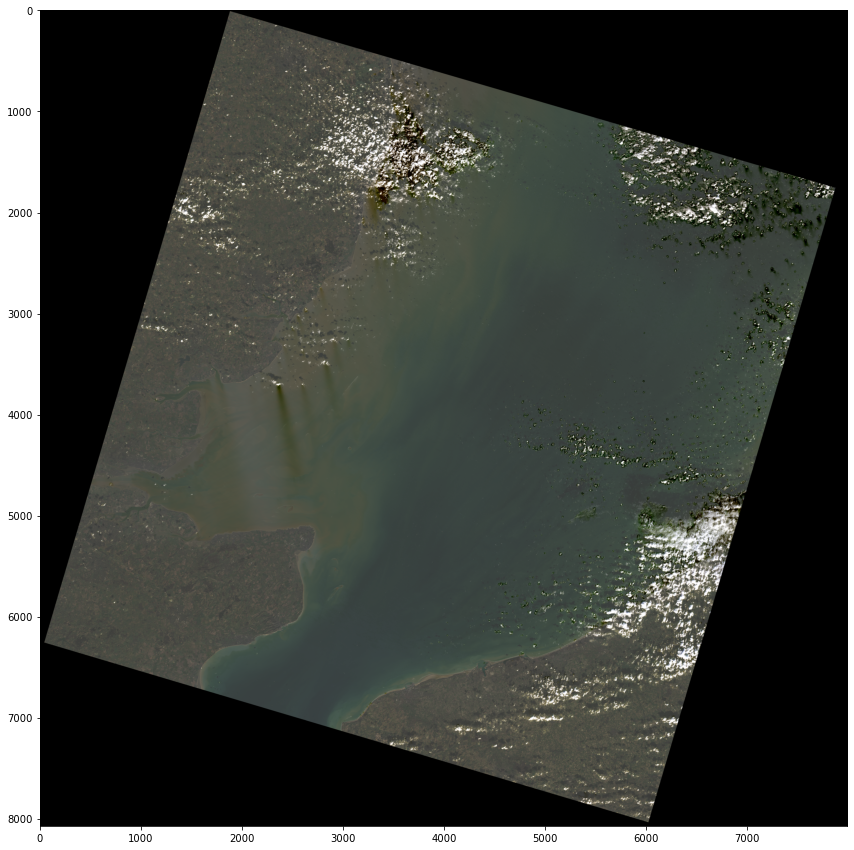

In [56]:
display_true_colour(data, 'B4', 'B3', 'B2', alpha=2.)